In [2]:
import pandas as pd
df=pd.read_csv("fct_invoice.csv")

In [33]:
df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


# Easy 1

In [24]:
df["customer_id"].nunique()

5191

# Easy 2

In [27]:
df["category"].nunique()

8

In [28]:
df["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

# Easy 3

In [32]:
df["payment_method"].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

# Medium 1

In [3]:
df["total_sales"]=df["quantity"]*df["price"]
sum_total_sales_per_category=df.groupby("category").sum()['total_sales']
most_popular=sum_total_sales_per_category.nlargest(3)
print(most_popular)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


/var/folders/y1/dczcm2p911q45bk490sxs9t80000gn/T/ipykernel_29085/3788017078.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_total_sales_per_category=df.groupby("category").sum()['total_sales']


# Medium 2

In [77]:
json_df = pd.read_json("dim_customer.json")
merge_df=df.merge(json_df,how="left", left_on = 'customer_id', right_on = 'id')


filtered_df = df[merge_df['age'] > 45]
filtered_df.sum()["total_sales"]


82039768.15

# Medium 3

/var/folders/y1/dczcm2p911q45bk490sxs9t80000gn/T/ipykernel_29085/3782545991.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["datetime"] = pd.to_datetime(df["invoice_date"])


Season
Spring    70561941.97
Summer    61312910.14
Autumn    59782207.52
Winter    59848734.62
Name: total_sales, dtype: float64


Text(0.5, 1.0, 'Season sales distribution')

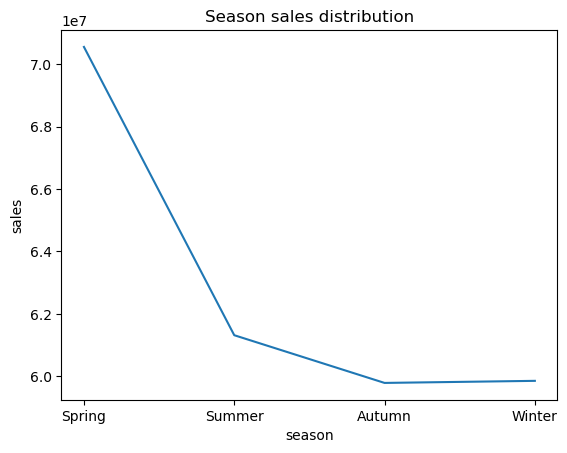

In [4]:
import matplotlib.pyplot as plt 
import numpy as np

df["datetime"] = pd.to_datetime(df["invoice_date"])
df['Season'] = pd.cut(df['datetime'].dt.month, [0, 3, 6, 9, 12], labels=['Spring', 'Summer', 'Autumn', 'Winter'])
seasonal_sales = df.groupby('Season')['total_sales'].sum()

print(seasonal_sales)

plt.plot(seasonal_sales)
plt.xlabel('season')
plt.ylabel('sales')
plt.title("Season sales distribution")

#Based on the graph below, it tells us there is the highest demand during spring season

# Hard

In [7]:
from pandas import Series, DataFrame
json_df = pd.read_json("dim_customer.json")
merge_df=df.merge(json_df,how="left", left_on = 'customer_id', right_on = 'id')
merge_df['age_range'] = pd.cut(merge_df['age'],[9,19,29,39,49,59,69,79,89])
merge_df.pivot_table(index="category",columns="age_range",values="total_sales",aggfunc="sum")

age_range,"(9, 19]","(19, 29]","(29, 39]","(39, 49]","(49, 59]","(59, 69]","(69, 79]","(79, 89]"
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
